In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [116]:
# load zoo dataset 
data = pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [117]:
# all columns are of numerical dtype except 
# 'animal name' column
# no null values present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [118]:
# dataset contains 101 observations 
# and 10 columns 
data.shape

(101, 18)

In [119]:
# num of duplicated observations 
print(f'No. of duplicated observations : {data.duplicated().sum()}')

No. of duplicated observations : 0


In [120]:
# features and target (not encoded)
X = data.iloc[:,:-1]
Y = data[['type']]

In [121]:
# encoding 'animal name' column
enc = LabelEncoder()
X['animal name'] = enc.fit_transform(data['animal name'])
encDict = dict(zip(np.arange(enc.classes_.size),enc.classes_))

In [122]:
# encoded feature dataset 
X.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [123]:
# splitting dataset into training and testing data 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,
                                                    random_state=42)

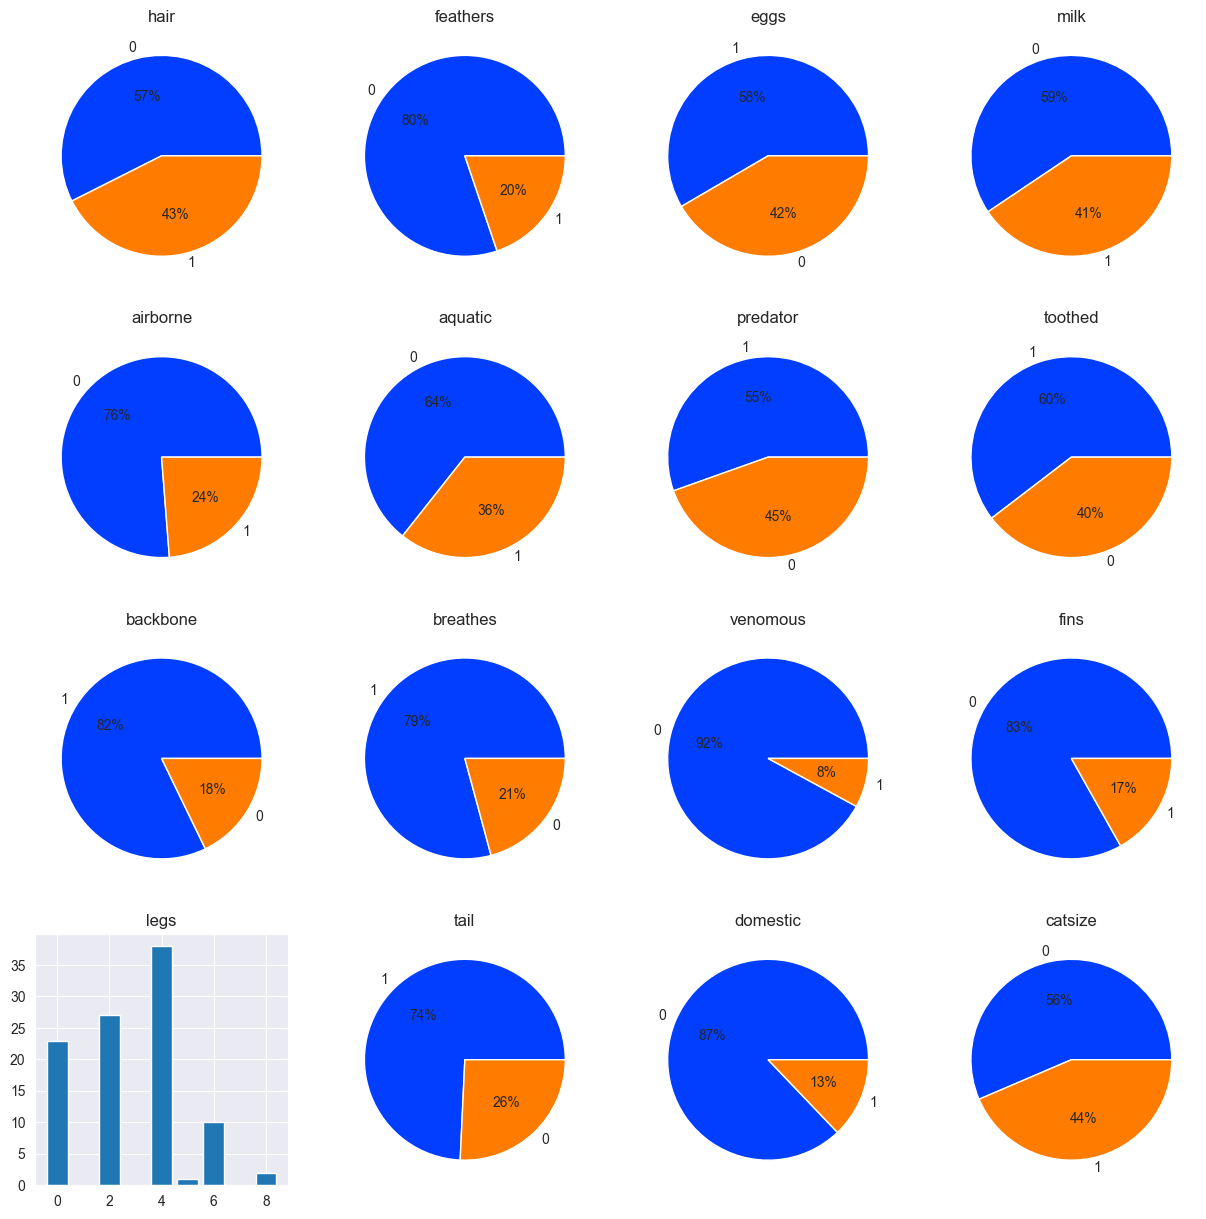

In [124]:
# feature data 
plt.figure(figsize=(15,15))
for p in range(1,len(X.columns)):
    if p != 13:
        plt.subplot(4,4,p)
        n = data[X.columns[p]].value_counts()
        plt.pie(n.values,labels=n.index,
            colors=sns.color_palette('bright'),autopct='%.0f%%')
        plt.title(X.columns[p])
    else:
        plt.subplot(4,4,p)
        n = data[X.columns[p]].value_counts()
        plt.bar(n.index,n.values)
        plt.title(X.columns[p])

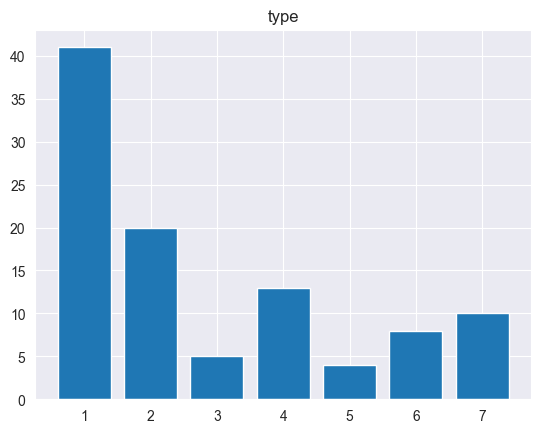

In [125]:
# target data 'type'
n = data.type.value_counts()
plt.bar(n.index,n.values)
plt.title('type')
plt.show()

In [126]:
# using brute force approach find train/test error 
# for individual k values 
trainScore = []
testScore = []
neighbors = []
for num in range(1,21):
    model = KNeighborsClassifier(n_neighbors=num)
    model.fit(X_train,Y_train)
    trainScore.append(1-model.score(X_train,Y_train))
    testScore.append(1-model.score(X_test,Y_test))
    neighbors.append(num)

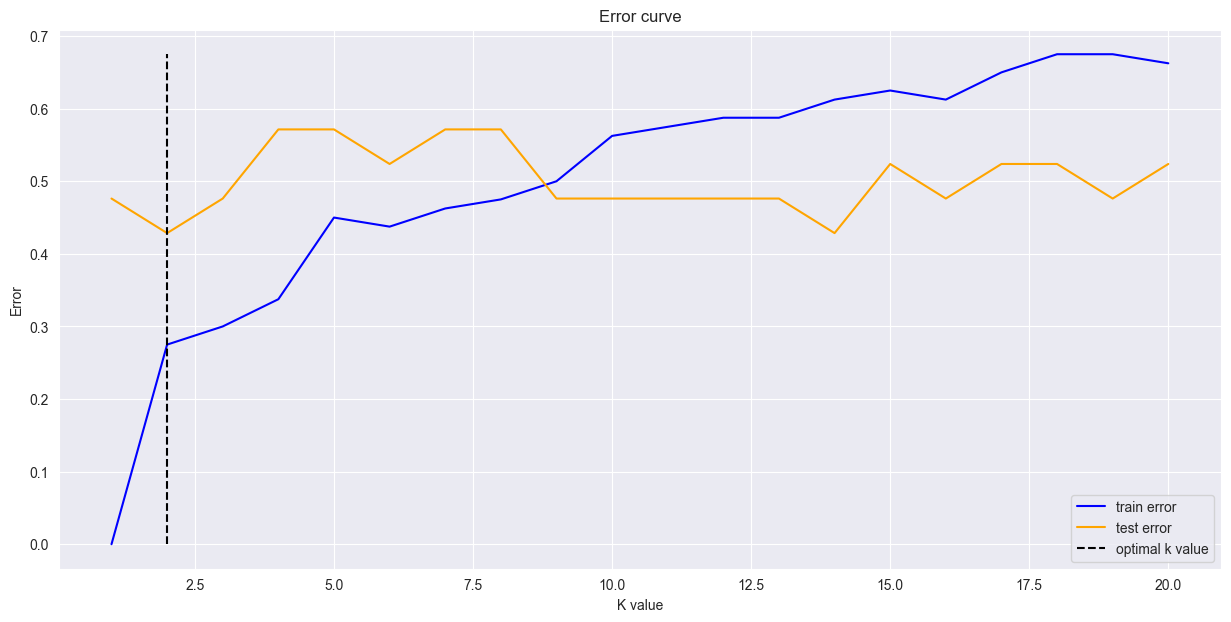

In [127]:
# visualize error curve 
plt.figure(figsize=(15,7))
plt.plot(neighbors,trainScore,color='blue',
         label='train error')
plt.plot(neighbors,testScore,color='orange',
         label='test error')
ub = max([max(trainScore),max(testScore)])
lb = min([min(trainScore),min(testScore)])
k_opt = neighbors[testScore.index(min(testScore))]
plt.plot([k_opt,k_opt],[lb,ub],color='black',linestyle='dashed',label='optimal k value')
plt.title('Error curve')
plt.ylabel('Error')
plt.xlabel('K value')
plt.legend()
plt.show()

### KNN classifier gives min testing error at k = 2

In [128]:
# making KNN classifier with optimized n_neighbors
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [129]:
print(f'Training accuracy of KNN classifier : {round(clf.score(X_train,Y_train)*100,2)}%')
print(f'Testing accuracy of KNN classifier : {round(clf.score(X_test,Y_test)*100,2)}%')

Training accuracy of KNN classifier : 72.5%
Testing accuracy of KNN classifier : 57.14%


In [130]:
# making predictions on testing data 
np.set_printoptions(suppress=True)
testData = X_test.copy(deep=True)
testData['animal name'] = enc.inverse_transform(X_test.iloc[:,0])
testData['Predicted Type'] = clf.predict(X_test)
testData.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Predicted Type
84,squirrel,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0,2
55,oryx,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
66,porpoise,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1
67,puma,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
45,lion,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## built KNN classifier to predict animal type with training accuracy of 72.50% and testing accuracy of 57.14%